In [ ]:
pip install beautifulsoup4 requests


In [ ]:
pip install selenium


In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pip install pandas

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

# Set up Selenium WebDriver (adjust the path to your ChromeDriver)
driver = webdriver.Chrome()

# Base URL (excluding the page number)
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/{}/?sortby=post_date%3ADesc&pagesize=100"

# Create an empty list to hold the review data
reviews_data = []

# Define the number of pages you want to scrape
num_pages = 39  # Adjust this value based on how many pages you want to scrape

# Loop through each page
for page in range(1, num_pages + 1):
    # Construct the URL for the current page
    url = base_url.format(page)

    # Open the current page
    driver.get(url)
    time.sleep(5)  # Wait for the page to load

    # Find all the review containers
    reviews = driver.find_elements(By.CLASS_NAME, 'comp_media-review-rated')

    # Loop through each review and extract details
    for review in reviews:
        try:
            # Extract the rating
            rating = review.find_element(By.CLASS_NAME, 'rating-10').text.strip()

            # Extract the review title
            review_title = review.find_element(By.CLASS_NAME, 'text_header').text.strip()

            # Extract the author name
            author = review.find_element(By.CSS_SELECTOR, 'span[itemprop="name"]').text.strip()

            # Extract the review date
            review_date = review.find_element(By.TAG_NAME, 'time').text.strip()

            # Extract the review body
            review_body = review.find_element(By.CLASS_NAME, 'text_content').text.strip()

            # Append the review data to the list
            reviews_data.append({
                'title': review_title,
                'rating': rating,
                'author': author,
                'date': review_date,
                'review': review_body
            })
            print(review_title)
        except Exception as e:
            print(f"Error extracting review: {e}")

# Close the browser
driver.quit()

# Create a DataFrame from the list of review data
df = pd.DataFrame(reviews_data, columns=['title', 'rating', 'author', 'date', 'review'])

# Display the DataFrame
print(df)

# Optionally save the DataFrame to a CSV file
df.to_csv('british_airways_reviews.csv', index=False)


"my luggage is missing"
"work is needed to provide a better customer experience"
"barely a step above low cost airlines"
"Happy with the flight crew"
"seats are super uncomfortable"
"very disappointed"
"happily recommend and use BA"
"cannot get compensation for our flight"
“Crew very friendly and attentive”
"A nightmare journey"
“One gets better service in McDonalds”
“shocking food, service, exorbitant prices”
"delayed with no explanation"
"Sound food and drink offered"
“beyond appalled, hurt and frustrated”
"experience was overall very poor"
“the entire travel was cancelled”
“service offered was exceptional”
"No meal served"
“no response to complaint”
“cabin crew are brilliant”
"may never see your refund"
“failed to enjoy business class”
“somewhere below easyJet, above Ryanair”
"zero response from BA to reimburse us"
"no acknowledgment or resolution"
"Outstanding service"
"the crew were fabulous"
“customer service has been horrible”
"Not as much as an apology"
"no one attending or car

In [ ]:
df.describe(include='all')

,title,rating,author,date,review
count,3866,3866,3866,3866,3866
unique,2837,11,3027,1946,3852
top,British Airways customer review,1/10,David Ellis,19th January 2015,British Airways from Tampa to Gatwick on Boein...
freq,956,922,43,26,2


In [ ]:
df.dtypes

title     object
rating    object
author    object
date      object
review    object
dtype: object

<Axes: xlabel='rating'>

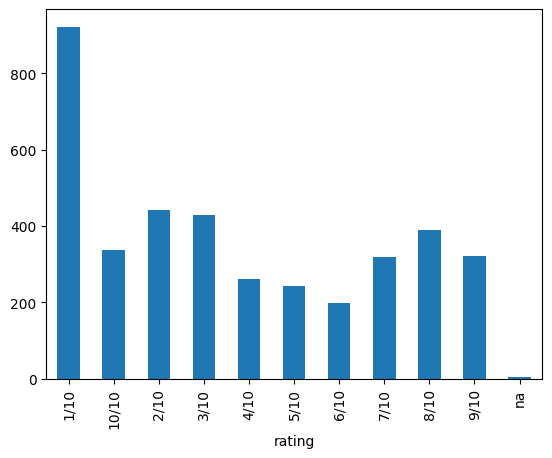

In [ ]:
df['rating'].value_counts().sort_index().plot(kind='bar')

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
pip install vaderSentiment


In [ ]:
import pandas as pd
import nltk

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each review
def get_sentiment(review):
    sentiment = analyzer.polarity_scores(review)
    return sentiment['compound']  # Return the compound score (overall sentiment)

# Apply the function to the 'review' column in the DataFrame
df['sentiment_score'] = df['review'].apply(get_sentiment)

# Optionally, categorize the sentiment into Positive, Negative, or Neutral
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Add the sentiment category to the DataFrame
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Display the DataFrame with sentiment scores and categories
print(df[['review', 'sentiment_score', 'sentiment_category']])


                                                 review  sentiment_score  \
0     ✅ Trip Verified | British Airways Flight from ...          -0.7535   
1     ✅ Trip Verified | British Airways World Travel...           0.9747   
2     ✅ Trip Verified | BA is barely a step above lo...          -0.7650   
3     Not Verified | Happy with the flight crew. Had...           0.7005   
4     ✅ Trip Verified |   Horrible service from boar...          -0.9246   
...                                                 ...              ...   
3861  Flew LHR - VIE return operated by bmi but BA a...           0.9741   
3862  LHR to HAM. Purser addresses all club passenge...           0.8720   
3863  My son who had worked for British Airways urge...           0.6640   
3864  London City-New York JFK via Shannon on A318 b...           0.9148   
3865  SIN-LHR BA12 B747-436 First Class. Old aircraf...           0.2244   

     sentiment_category  
0              Negative  
1              Positive  
2        

In [ ]:
df['review'][df['sentiment_category'] =='Neutral'].iloc[10]

'✅ Trip Verified | BA cancelled flight in Dec 2020. Refund was promised in voucher form by call center. We are now 6 months down the line, 13 calls of which each is 40 min waiting time, and 16 email reminders. Conclusion is that they are just going in circles to avoid issuing any voucher. Head of call center is keeping to her empty promises.'

In [ ]:
pip install seaborn

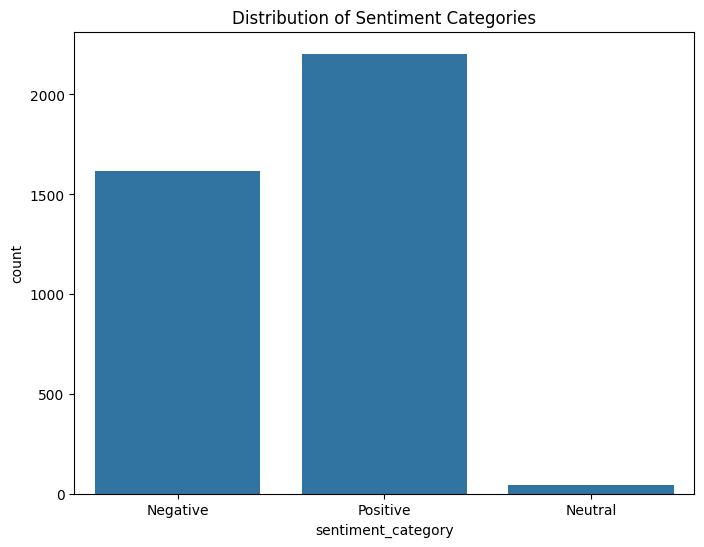

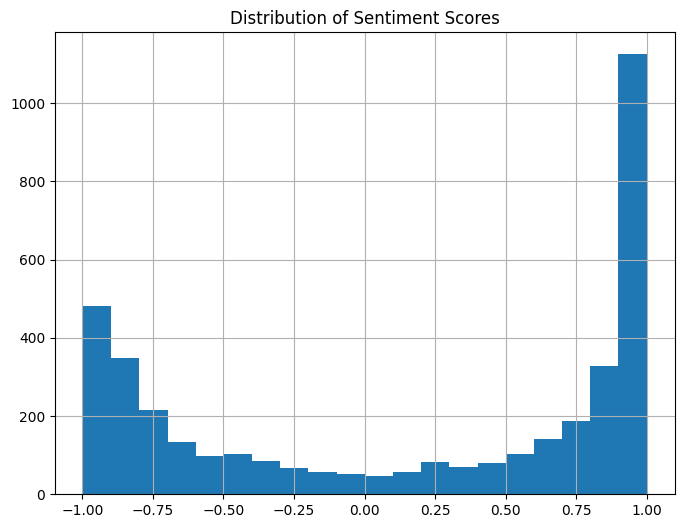

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment categories
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment_category', data=df,)
plt.title('Distribution of Sentiment Categories')
plt.show()

# Plot histogram of sentiment scores
plt.figure(figsize=(8,6))
df['sentiment_score'].hist(bins=20)
plt.title('Distribution of Sentiment Scores')
plt.show()

C:\Users\nigar.r\AppData\Local\Temp\ipykernel_12488\1769501494.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_category', y='percentage', data=percentage_df, palette='viridis')


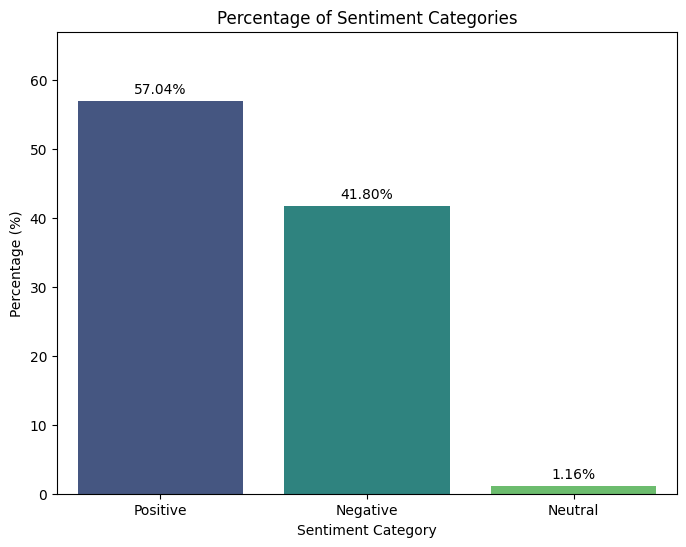

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with the sentiment categories

# Calculate the counts and percentages
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_percentage = (sentiment_counts / sentiment_counts.sum()) * 100

# Create a DataFrame for easier plotting
percentage_df = sentiment_percentage.reset_index()
percentage_df.columns = ['sentiment_category', 'percentage']

# Create a bar plot with percentages
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_category', y='percentage', data=percentage_df, palette='viridis')

# Add labels and title
plt.title('Percentage of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage (%)')

# Annotate the percentage on the bars
for index, value in enumerate(percentage_df['percentage']):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center')

plt.ylim(0, percentage_df['percentage'].max() + 10)  # Add some space above the bars
plt.show()


In [ ]:
pip install torch torchvision torchaudio


In [ ]:
pip install torch


In [ ]:
pip install transformers


In [ ]:
pip install tqdm


In [ ]:
import torch
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from tqdm import tqdm  # Import tqdm for the progress bar

# Load the pre-trained tokenizer and model from Cardiff NLP (Twitter sentiment)
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

# Define the label mapping (for this specific model: 0 = negative, 1 = neutral, 2 = positive)
label_map = {0: "negative", 1: "neutral", 2: "positive"}

# Define a function to get predictions for each review
def get_prediction(text):
    try:  # Tokenize the input
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

        # Forward pass (inference)
        with torch.no_grad():
            outputs = model(**inputs)

        # Get predictions (logits)
        logits = outputs.logits

        # Apply softmax to get probabilities
        probs = torch.softmax(logits, dim=1)

        # Get the predicted label (index of the maximum probability)
        predicted_label_idx = torch.argmax(probs, dim=1).item()

        # Return the corresponding label (positive, neutral, negative)
        return label_map[predicted_label_idx]
    except:
        RuntimeError


# Enable tqdm for progress bar
tqdm.pandas()  # Add progress_apply to use progress bar

# Apply the sentiment prediction function to each review with progress bar
df['sentiment_roberta'] = df['review'].progress_apply(get_prediction)



c:\Users\nigar.r\AppData\Local\anaconda3\envs\myenv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 3866/3866 [08:59<00:00,  7.16it/s]


In [ ]:
df['review'].iloc[2]

"Not Verified | Happy with the flight crew. Hadn't been on a plane in 20 years and was stressed out. They made it comfortable for me and I want to say thank you to the flight crew for helping me relax. If I go back to France again, I'm going British Airways."

In [ ]:
df

,title,rating,author,date,review,sentiment_score,sentiment_category,sentiment_roberta
0,"""my luggage is missing""",4/10,Biswajit Mohanty,4th October 2024,✅ Trip Verified | British Airways Flight from ...,-0.7535,Negative,negative
1,"""work is needed to provide a better customer e...",5/10,Christopher Neep,28th September 2024,✅ Trip Verified | British Airways World Travel...,0.9747,Positive,positive
2,"""barely a step above low cost airlines""",2/10,D Hane,25th September 2024,✅ Trip Verified | BA is barely a step above lo...,-0.7650,Negative,negative
3,"""Happy with the flight crew""",10/10,John Brown,24th September 2024,Not Verified | Happy with the flight crew. Had...,0.7005,Positive,positive
4,"""seats are super uncomfortable""",1/10,C Haddei,22nd September 2024,✅ Trip Verified | Horrible service from boar...,-0.9246,Negative,negative
...,...,...,...,...,...,...,...,...
3861,British Airways customer review,10/10,J Tinning,29th August 2012,Flew LHR - VIE return operated by bmi but BA a...,0.9741,Positive,positive
3862,British Airways customer review,9/10,Nick Berry,28th August 2012,LHR to HAM. Purser addresses all club passenge...,0.8720,Positive,positive
3863,British Airways customer review,5/10,Avril Barclay,12th October 2011,My son who had worked for British Airways urge...,0.6640,Positive,neutral
3864,British Airways customer review,4/10,C Volz,11th October 2011,London City-New York JFK via Shannon on A318 b...,0.9148,Positive,positive


In [ ]:
df.columns

Index(['title', 'rating', 'author', 'date', 'review', 'sentiment_score',
       'sentiment_category', 'sentiment_roberta'],
      dtype='object')

In [ ]:
df['rating'].replace('na', pd.NA, inplace=True)

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'] =df['rating'].astype(str)

In [ ]:
df['rating'] = df['rating'].str.split('/').str[0]

In [ ]:
df['rating'] = df['rating'].astype(float)

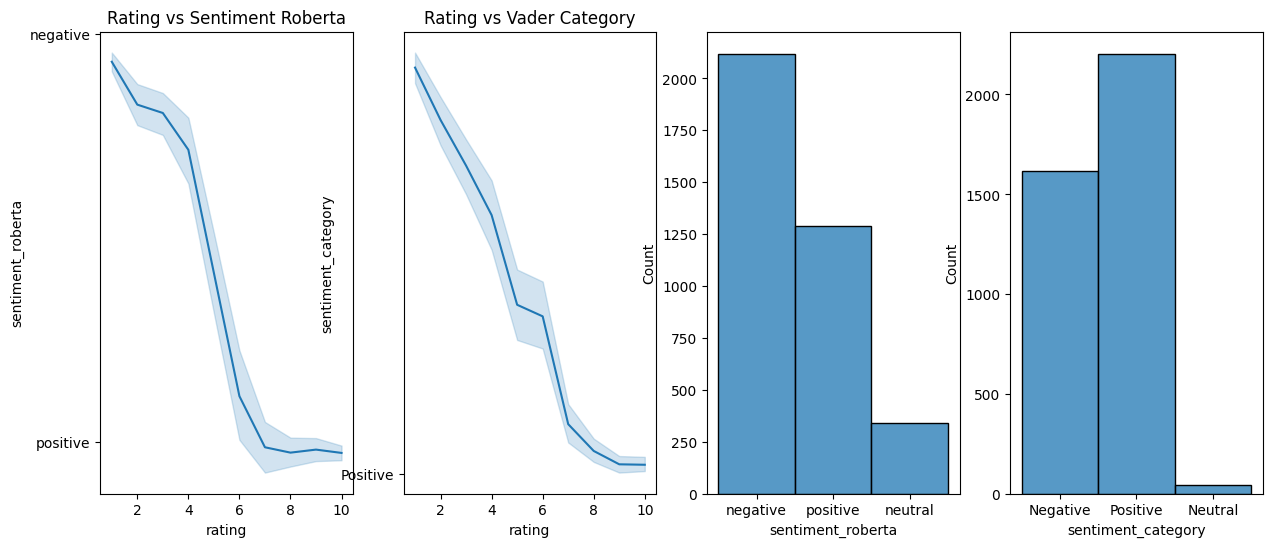

In [ ]:

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2, ax3 ,ax4) = plt.subplots(1, 4, figsize=(15, 6))

# Plot on the first axis (ax1)
sns.lineplot(data=df, x='rating', y='sentiment_roberta', ax=ax1)
ax1.set_title('Rating vs Sentiment Roberta')

# Plot on the second axis (ax2)
sns.lineplot(data=df, x='rating', y='sentiment_category', ax=ax2)
ax2.set_title('Rating vs Vader Category')

sns.histplot(data=df, x='sentiment_roberta', ax=ax3)
sns.histplot(data=df, x='sentiment_category', ax=ax4)


# Show the plots
plt.show()


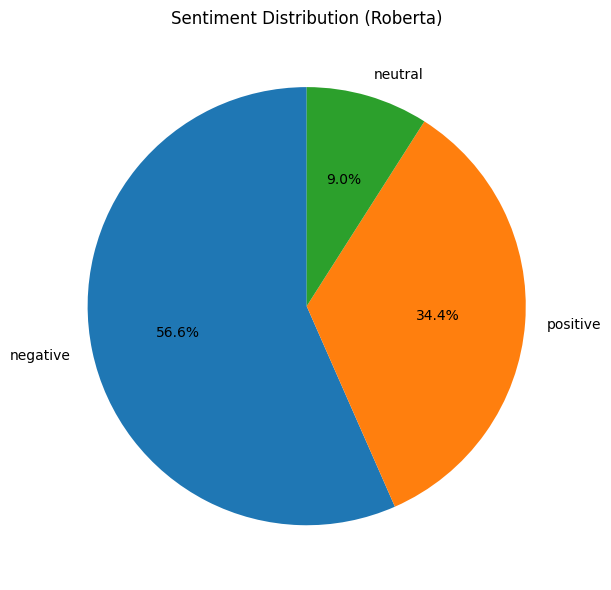

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Count occurrences of each category for sentiment_roberta
roberta_counts = df['sentiment_roberta'].value_counts()


# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6))

# Plot pie chart for sentiment_roberta
ax1.pie(roberta_counts, labels=roberta_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Sentiment Distribution (Roberta)')

# Show the plots
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nigar.r\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\nigar.r\AppData\Local\Temp\ipykernel_12488\768126764.py:57: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\nigar.r\AppData\Local\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


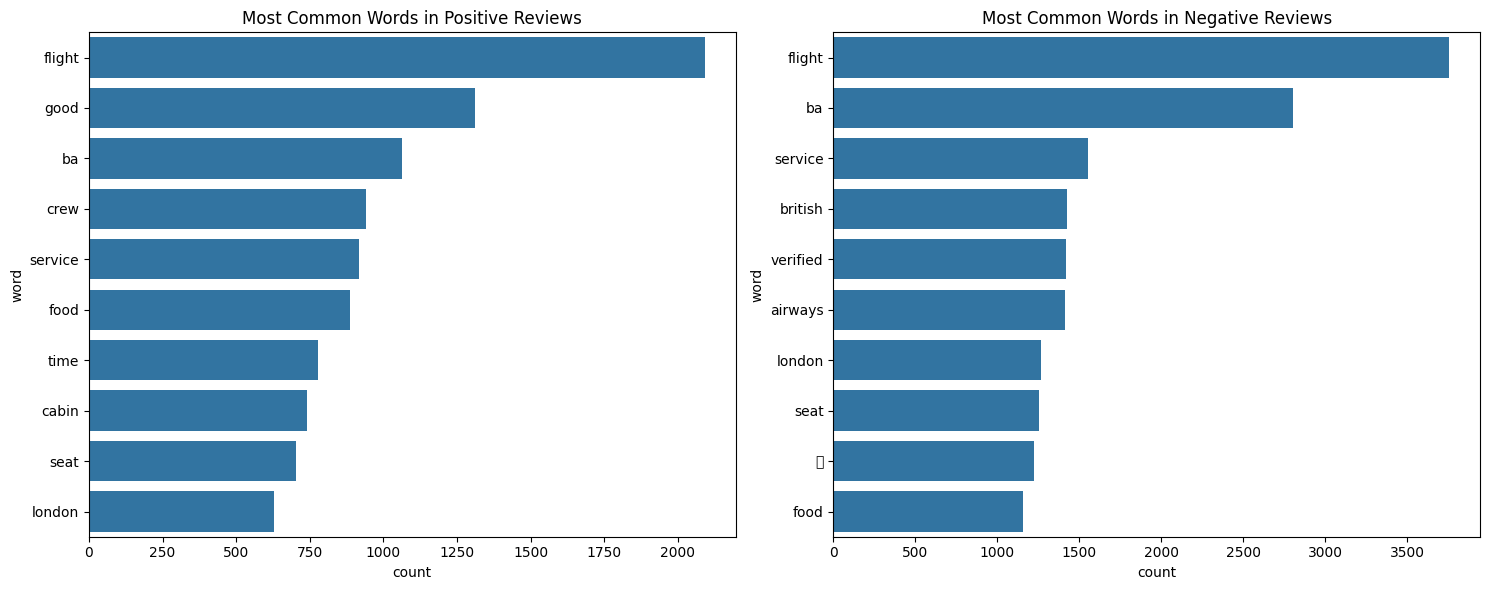

In [ ]:
import pandas as pd
import string
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have downloaded the NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords



# Preprocess the text (lowercase, remove punctuation and stopwords)
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return words

# Separate positive and negative reviews
positive_reviews = df[df['sentiment_roberta'] == 'positive']['review'].apply(preprocess)
negative_reviews = df[df['sentiment_roberta'] == 'negative']['review'].apply(preprocess)

# Flatten the lists of words (combine all reviews into one list of words)
positive_words = [word for review in positive_reviews for word in review]
negative_words = [word for review in negative_reviews for word in review]

# Count word frequencies
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the most common words
top_positive = positive_word_counts.most_common(10)
top_negative = negative_word_counts.most_common(10)

# Convert to DataFrame for visualization
positive_df = pd.DataFrame(top_positive, columns=['word', 'count'])
negative_df = pd.DataFrame(top_negative, columns=['word', 'count'])

# Plot the most common words for positive and negative categories
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Positive words bar plot
sns.barplot(x='count', y='word', data=positive_df, ax=ax1)
ax1.set_title('Most Common Words in Positive Reviews')

# Negative words bar plot
sns.barplot(x='count', y='word', data=negative_df, ax=ax2)
ax2.set_title('Most Common Words in Negative Reviews')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
df.query('rating == 1').sort_values('sentiment_roberta',ascending = False)['review'].values[1]

"I used British Airways Club Europe from LGW to Naples. Basically the flight is the same as long haul economy except no entertainment and the middle seat is left empty? As far as I can tell there is no difference in legroom and seats are identical to economy. I'm not sure how British Airways can pass this off as Business class. My advice if booking a business class flight in Europe, look at competitors otherwise book economy and save the money. Only really good thing about flight was an amazing cabin staff that looked after us really well."